# Example of confidence interval computation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import zfit
from zfit.loss import ExtendedUnbinnedNLL
from zfit.minimize import Minuit

from skstats.hypotests.calculators import AsymptoticCalculator
from skstats.hypotests import ConfidenceInterval
from skstats.hypotests.parameters import POI

/Users/matthieumarinangeli/anaconda3/envs/tfn/lib/python3.7/site-packages/zfit/util/execution.py:61: UserWarning: Not running on Linux. Determining available cpus for thread can failand be overestimated. Workaround (only if too many cpus are used):`zfit.run.set_n_cpu(your_cpu_number)`
  warnings.warn("Not running on Linux. Determining available cpus for thread can fail"


### Fit of a Gaussian signal over an exponential background:

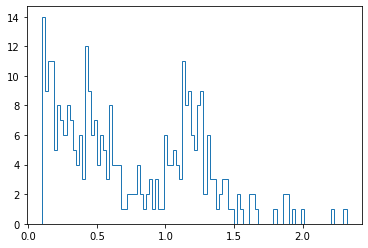

In [2]:
bounds = (0.1, 3.0)

# Data and signal

np.random.seed(0)
tau = -2.0
beta = -1/tau
data = np.random.exponential(beta, 300)
peak = np.random.normal(1.2, 0.1, 80)
data = np.concatenate((data,peak))
data = data[(data > bounds[0]) & (data < bounds[1])]

plt.hist(data, bins=100, histtype='step');

In [3]:
obs = zfit.Space('x', limits=bounds)

In [4]:
mean = zfit.Parameter("mean", 1.2, 0.5, 2.0)
sigma = zfit.Parameter("sigma", 0.1, 0.02, 0.2)
lambda_ = zfit.Parameter("lambda",-2.0, -4.0, -1.0)
Nsig = zfit.Parameter("Nsig", 20., -20., len(data))
Nbkg = zfit.Parameter("Nbkg", len(data), 0., len(data)*1.1)

In [5]:
signal = Nsig * zfit.pdf.Gauss(obs=obs, mu=mean, sigma=sigma)
background =  Nbkg * zfit.pdf.Exponential(obs=obs, lambda_=lambda_)
tot_model = signal + background

In [6]:
# Create the negative log likelihood
data_ = zfit.data.Data.from_numpy(obs=obs, array=data)
nll = ExtendedUnbinnedNLL(model=[tot_model], data=[data_]) 

In [7]:
# Instantiate a minuit minimizer
minimizer = Minuit()

In [8]:
# minimisation of the loss function
minimum = minimizer.minimize(loss=nll)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Prefer Variable.assign which has equivalent behavior in 2.X.


FCN = -1430.5234295052785 
 TOTAL NCALL = 148 
 NCALLS = 148 
 
 
 EDM = 9.565836255967087e-07 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,Nsig,79.1108,11.766,,,-20,326,No
1,sigma,0.112522,0.0167956,,,0.02,0.2,No
2,mean,1.19824,0.0173339,,,0.5,2,No
3,lambda,-1.98067,0.157309,,,-4,-1,No
4,Nbkg,246.905,17.4788,,,0,358.6,No


In [9]:
def plotfitresult(pdf, bounds, nbins, data):
    x = np.linspace(*bounds, num=1000)
    pdf = zfit.run(tot_model.pdf(x, norm_range=bounds)* tot_model.get_yield())
    _ = plt.plot(x, ((bounds[1] - bounds[0])/nbins)*(pdf), "-r", label="fit result")

Text(0, 0.5, 'number of events')

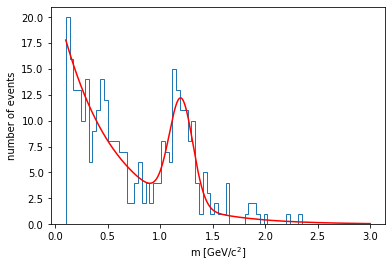

In [10]:
nbins = 80
plt.hist(data, bins=nbins, histtype='step', range=bounds);
plotfitresult(tot_model, bounds, nbins, data)
plt.xlabel("m [GeV/c$^2$]")
plt.ylabel("number of events")

### Confidence interval

We want to compute the confidence interval of the mean of the Gaussian at 68% confidence level.

In [11]:
# instantation of the calculator
calculator = AsymptoticCalculator(nll, minimizer)
calculator.bestfit = minimum #optionnal

In [12]:
# parameter of interest of the null hypothesis
poinull = POI(mean, np.linspace(1.15, 1.26, 100))

In [13]:
# instantation of the discovery test
ci = ConfidenceInterval(calculator, [poinull])

In [26]:
ci.interval();

Compute qobs for the null hypothesis!

Confidence interval on mean:
	1.1810371416291816 < mean < 1.2156701112550634 at 1.0% C.L.


Compute qobs for the null hypothesis!


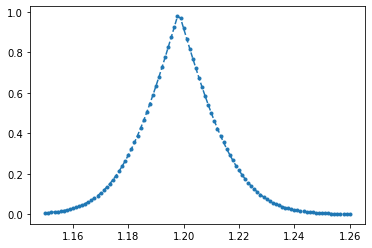

In [15]:
plt.plot(poinull.value, ci.pvalues(), ".--")

In [16]:
from scipy import interpolate

In [17]:
from scipy.interpolate import interp1d

In [18]:
def interp(x, y):
    kinds = iter(["cubic", "quadratic", "slinear", "linear"])

    while True:
        try:
            pois = interp1d(x, y, kind=next(kinds))
            return pois
        except ValueError:
            continue

In [19]:
cubic = interp1d(poinull.value, ci.pvalues(), kind="cubic")

Compute qobs for the null hypothesis!


Compute qobs for the null hypothesis!


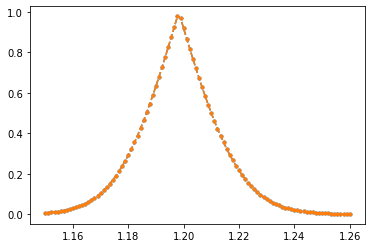

In [20]:
plt.plot(poinull.value, ci.pvalues(), ".--")
plt.plot(poinull.value, cubic(poinull.value), ".--")

In [21]:
tck = interpolate.splrep(poinull.value, ci.pvalues(), s=0)

Compute qobs for the null hypothesis!


Compute qobs for the null hypothesis!


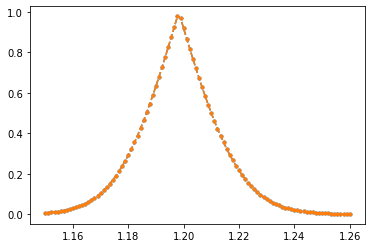

In [22]:
plt.plot(poinull.value, ci.pvalues(), ".--")
plt.plot(poinull.value, interpolate.splev(poinull.value, tck, der=0), ".--")

In [23]:
tck = interpolate.splrep(poinull.value, ci.pvalues() -0.32, s=0)

Compute qobs for the null hypothesis!


In [24]:
root = interpolate.sproot(tck)

In [25]:
root

array([1.18103714, 1.21567011])